<a href="https://colab.research.google.com/github/Kazantsev-Alexey/ML_DS/blob/main/%22HW_lessons_9_10_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1d-vvpJW8IWSPeodFnfaEVaZIQrys8uU0?usp=sharing

Ссылка на дз https://colab.research.google.com/drive/1sEsPjnqCTcHNX7oaVPIecJtfeJPoTTkY?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Производная: $$ f'(x[1,2])=2x[1]+10x[2]$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return x[0]**2+ 5*(x[1]**2)   
def df(x):
    return np.array([2*x[0], 10*x[1]])
step_sum=0
def grad_descent_const_step(x = np.array([3, 8]), alpha = 0.001, epsilon = 0.05):
    grad = df(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = df(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуст с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x
    
x = grad_descent_const_step(alpha = 0.1)
x = grad_descent_const_step(alpha = 0.19) #шаг стал больше почти в два раза и прошагать пришлось даже больше чем в два раза
x = grad_descent_const_step(alpha = 0.01, epsilon = 0.05)

Градиентный спуст с постоянным шагом выполнил 24 шагов
Точка с координатами х1 = 0.014167099448608939, x2 = 0.0
Градиентный спуст с постоянным шагом выполнил 73 шагов
Точка с координатами х1 = 2.0975609445461556e-15, x2 = -0.0036542072596062024
Градиентный спуст с постоянным шагом выполнил 239 шагов
Точка с координатами х1 = 0.023996800735217934, x2 = 9.269359862008459e-11


In [2]:

def grad_descent_step_splitting(x = np.array([3, 8]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = df(x)
    n = 0
    count_alpha = 0
    alpha_k = alpha
    x_const = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = df(x_const)
        x_new = x_const - alpha_k*grad
        while f(x_new) - f(x_const) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_new = x_const - alpha_k*grad
            count_alpha+=1
            
        x_const = x_const - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_const
    print("Градиентный спуст с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(count_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x
a = grad_descent_step_splitting()
a = grad_descent_step_splitting(lambda_d = 0.3)
a = grad_descent_step_splitting(alpha = 0.5, lambda_d = 0.4)

Градиентный спуст с дроблением шага выполнил 17 шагов
Выполнено 37 итераций дробления шага
Точка с координатами х1 = 0.002402939112415913, x2 = 0.0008048753406231878
Градиентный спуст с дроблением шага выполнил 13 шагов
Выполнено 20 итераций дробления шага
Точка с координатами х1 = 0.0030632198623356532, x2 = 5.120000000000016e-05
Градиентный спуст с дроблением шага выполнил 16 шагов
Выполнено 22 итераций дробления шага
Точка с координатами х1 = 0.006372494582443984, x2 = 0.0005119999999999977


Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
def f(x):
    return x[0]**2+ 5*(x[1]**2)   
def df(x):
    return np.array([2*x[0], 10*x[1]])

all_iterations=50
min_lr = 0.001
def speed_decrease(iteration):
  iteration = min(n, all_iterations)
  anneal_lr = 0.5 * (1 + cos(pi * iteration / all_iterations))
  decayed = (1 - min_lr) * anneal_lr + min_lr
  alpha_k= alpha * decayed
  return alpha_k
def cosine_decay(x = np.array([3, 8]), alpha = 1, epsilon = 0.05, ksi = 0.5, min_lr = 0.001, all_iterations=50):
    grad = df(x)
    n = 0
    n1=1
    count_alpha = 0
    alpha_k = alpha
    x_const = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = df(x_const)
        x_new = x_const - alpha_k*grad
        while f(x_new) - f(x_const) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            iteration = min(n1, all_iterations)
            anneal_lr = 0.5 * (1 + m.cos(m.pi * iteration / all_iterations))
            decayed = (1 - min_lr) * anneal_lr + min_lr
            alpha_k= alpha_k * decayed
            
            x_new = x_const - alpha_k*grad
            count_alpha+=1
            n1+=1
        x_const = x_const - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_const
    print("Градиентный спуст с косинусным отжигом выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(count_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x
a = cosine_decay()

Градиентный спуст с косинусным отжигом выполнил 14 шагов
Выполнено 41 итераций дробления шага
Точка с координатами х1 = 0.009434675349673172, x2 = 1.3533130452564714e-06


### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

In [4]:

def f(x):
    return 1.5*(x[0]**3) + 2*(x[1]**2) + 3*x[1] + 11  
def df(x):
    return np.array([4.5*x[0],  4*x[1]+3])

all_iterations=50
min_lr = 0.001

a = cosine_decay()

Градиентный спуст с косинусным отжигом выполнил 6 шагов
Выполнено 30 итераций дробления шага
Точка с координатами х1 = -5.261870802974091e-06, x2 = -0.7493665234115292


### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


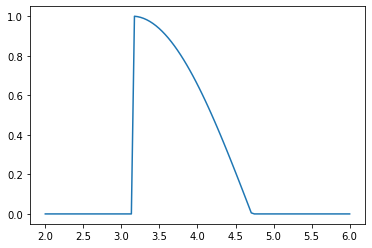

In [5]:
import seaborn as sns
import math as m
import numpy as np


def f(x):
  
  if x <= m.pi:
    y=0
  if x> m.pi and x <= (m.pi * 3)/2:
    y=  -m.cos(x)
  if  x > ((m.pi * 3)/2):
    y=0
  return y
x_axis= np.linspace (2, 6, 100)
y_axis= (f(i) for i in x_axis)
sns.lineplot(x_axis,y_axis)

Плотность вероятности:
$$
f'(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\sin x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


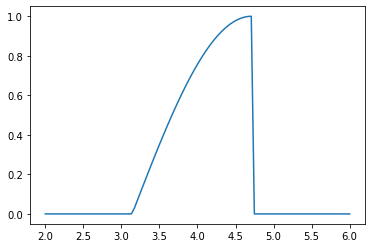

In [6]:
#график плотности вероятности
#тут в принципе просто табличное значение потому производную ососбо не расписать
def df(x):
    
  if x <= m.pi:
    y=0
  if x> m.pi and x <= (m.pi * 3)/2:
    y=  -m.sin(x)
  if  x > ((m.pi * 3)/2):
    y=0
  return y
x_axis= np.linspace (2, 6, 100)
y_axis= (df(i) for i in x_axis)
sns.lineplot(x_axis,y_axis)

Вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$
$$\int\limits_\pi^{\frac{5}{4}\pi} f(x)dx = \int\limits_\pi^{\frac{5}{4}\pi} -sin(x)dx=  cos(x)\bigg|_\pi^{\frac{5}{4}\pi} = cos({\frac{5}{4}\pi}) - cos(\pi)= 0.2928932188134523$$

Мат ожидание
$$\int\limits_\pi^{\frac{3}{2}\pi} xf(x)dx = \int\limits_\pi^{\frac{3}{2}\pi} x*-sin(x)dx =  (xcos(x)-sin(x))\bigg|_\pi^{\frac{3}{2}\pi} = {\frac{3}{2}\pi}cos({\frac{3}{2}\pi})- sin({\frac{3}{2}\pi}) - \pi cos(\pi)- sin(\pi)= 1 - (-\pi) \approx 4.14159  $$
Дисперсия
$$\int\limits_\pi^{\frac{3}{2}\pi} x^2 f(x)dx - M[x]^2 = -\int\limits_\pi^{\frac{3}{2}\pi} x^2*sin(x)dx - (1+\pi)^2=  -2xsin(x)+ x^2cos(x) -2cos(x) - (1+pi)\bigg|_\pi^{\frac{3}{2}\pi}=(x^2-2)cos(x)-2*x*sin(x)-(1+\pi)\bigg|_\pi^{\frac{3}{2}\pi}=({\frac{3}{2}\pi}^2-2)*cos({\frac{3}{2}\pi})-2({\frac{3}{2}\pi})*sin({\frac{3}{2}\pi})-(\pi^2-2)*cos(\pi)-2(\pi)*sin(\pi)-(1+\pi)=9.42477-(-7.86960)-17.15278=0.14159$$

In [7]:
import math as m
x=m.pi*3/2
y=m.pi
#оказывается флоат нельзя возводить в степень
(x*x-2)*m.cos(x)-2*x*m.sin(x)-((y*y-2)*m.cos(y)-2*x*m.sin(y))-(1+m.pi)*(1+m.pi)

0.14159265358978956

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


1. В точке x=1 получается 1-1=0, а вточке x=2, соответственно, 2-1=1 т.е величина неприрывна.
2. Производная от 0 и от 1 это ноль и $x-1= 1 - 0 = 1$,
тоже самое покажет интеграл вне зависимости от того какое значение приобретет константа  : $$\int\limits_1^2 1dx=x+ C\bigg|_1^2= 2+C -(1+C)=2-1=1$$
3. И соответственно графики:


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


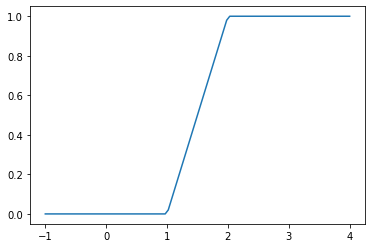

In [8]:
def F(x):
  y=0
  if x <=0:
    y=0
  elif 1<x <2:
    y=x-1
  elif x>2:
    y=1
  return y
x_axis= np.linspace (-1, 4, 100)
y_axis= (F(i) for i in x_axis)
sns.lineplot(x_axis,y_axis)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


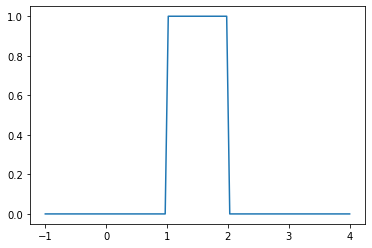

In [9]:
def f(x):
  y=0
  if x <=0:
    y=0
  elif 1<x <2:
    y=1
  elif x>2:
    y=0
  return y
x_axis= np.linspace (-1, 4, 100)
y_axis= (f(i) for i in x_axis)
sns.lineplot(x_axis,y_axis)

### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [10]:
Precision = 90/ (90+30)
Recall= 90/(90+10)
F1= (Precision*Recall)/((1*Precision)+ Recall)
print('Precision:', Precision, '\nRecall:', Recall , '\nF1:', F1, )

Precision: 0.75 
Recall: 0.9 
F1: 0.4090909090909091
